# Sentenepiece로 NSMC 감성분석하기

## 1. 예제

In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from konlpy.tag import Mecab
%matplotlib inline

In [2]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


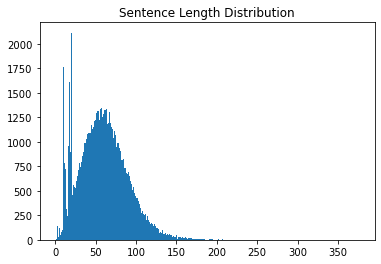

In [3]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [4]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [5]:
for idx, _sum in enumerate(sentence_length):
    # # 문장내 단어의 개수가 1500을 초과하는 인덱스를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [6]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


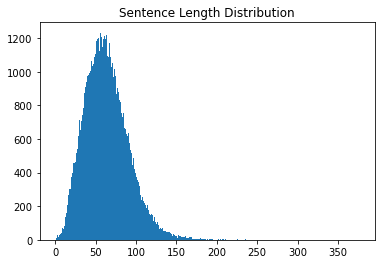

In [7]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

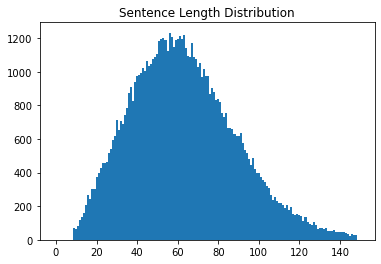

In [8]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [9]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [10]:
split_corpus = []

for kor in filtered_corpus:
  split_corpus.append(kor.split())

In [11]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [12]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [13]:
mecab = Mecab()
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [14]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


In [15]:
text = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(text[0])

tools for resolving broken promises , violated expectations and bad behavior ) ’ 의 저자 인 패터슨 은 “ 절교 를 하 는 사람 들 을 일반 적 으로 연락 을 끊 는다 ” 고 전했 다 .


In [16]:
sentence = ''

for w in mecab_tensor[100]:
  if w==0:
    continue
  sentence +=mecab_tokenizer.index_word[w] + " "
  
print(sentence)

tools for resolving broken promises , violated expectations and bad behavior ) ’ 의 저자 인 패터슨 은 “ 절교 를 하 는 사람 들 을 일반 적 으로 연락 을 끊 는다 ” 고 전했 다 . 


In [17]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 aiffel0038 aiffel0038 376901 10월 12 18:10 korean_spm.model
-rw-r--r-- 1 aiffel0038 aiffel0038 146388 10월 12 18:10 korean_spm.vocab


In [18]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1244, 11, 306, 7, 3599, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [19]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [20]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1949 5662    5    4 7975 1983    3    0    0    0    0    0    0    0]
 [ 107 1638  101    4    0  419   11    4   14    0 1969    3    3    3]]


## NSMC를 sentencepiece로 분석하기

In [21]:
import pandas as pd
nsmc_file = os.getenv("HOME") + '/aiffel/sentiment_classification/ratings_train.txt'
test_file = os.getenv("HOME") + '/aiffel/sentiment_classification/ratings_test.txt'
prefix = os.getenv('HOME') + '/aiffel/sp_tokenizer/nsmc'
nsmc = pd.read_csv(nsmc_file, sep = '\t', quoting = 3)
test = pd.read_csv(test_file, sep = '\t', quoting = 3)
print(nsmc.shape)
print(test.shape)


(150000, 3)
(50000, 3)


### 1. 결측치 제거

In [22]:
nsmc = nsmc.dropna(how = 'any')
print(nsmc.isnull().values.any())
print(nsmc.shape)

False
(149995, 3)


In [23]:
test = test.dropna(how = 'any')
print(test.isnull().values.any())
print(test.shape)

False
(49997, 3)


In [24]:
y_train = nsmc['label']
y_test = test['label']

### 2. text형식만 가져오기

In [25]:
with open(nsmc_file, 'w', encoding='utf8') as f:
    f.write('\n'.join(nsmc['document']))

In [26]:
with open(test_file, 'w', encoding = 'utf-8') as f2:
    f2.write('\n'.join(test['document']))

In [27]:
with open(nsmc_file, 'r', encoding = 'utf-8') as f:
    nsmc = f.read().split('\n')

In [28]:
with open(test_file, 'r', encoding = 'utf-8') as f:
    test_text = f.read().split('\n')

### 3. sentenpiece train하기

In [29]:
vocab_size = 8000
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(nsmc_file, vocab_size)    
)
!ls -l korean_spm*

-rw-r--r-- 1 aiffel0038 aiffel0038 374681 10월 12 18:11 korean_spm.model
-rw-r--r-- 1 aiffel0038 aiffel0038 144164 10월 12 18:11 korean_spm.vocab


In [30]:
sp = spm.SentencePieceProcessor()
sp.load('korean_spm.model')

True

### 4. sentencepiece 토큰화하기

In [31]:
def sp_tokenize(sp, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(sp.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [32]:
nsmc_tensor, nsmc_word_index, nsmc_index_word = sp_tokenize(sp, nsmc)
test_tensor, test_word_index, test_index_word = sp_tokenize(sp, test_text)

In [33]:
print(nsmc_tensor.shape)
print(y_train.shape)

(149995, 134)
(149995,)


### 5. 모델 만들기

In [61]:
from tensorflow import keras
word_vector_dim = 16 


model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(32, return_sequences = True))
model.add(keras.layers.SpatialDropout1D(0.4))
model.add(keras.layers.Dense(1, activation='sigmoid'))



model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          128000    
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 32)          6272      
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, None, 32)          0         
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           33        
Total params: 134,305
Trainable params: 134,305
Non-trainable params: 0
_________________________________________________________________


### 6. train data, valiation data나누기

In [62]:
x_val = nsmc_tensor[:10000]
y_val = y_train[:10000]

partial_x_train = nsmc_tensor[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(139995, 134)
(139995,)


In [63]:
print(test_tensor.shape)
print(y_test.shape)

(49997, 118)
(49997,)


### 7. model train하기

In [64]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    callbacks = [es],
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
274/274 [==============================] - 3s 10ms/step - loss: 0.5240 - accuracy: 0.7301 - val_loss: 0.3974 - val_accuracy: 0.8206
Epoch 2/10
274/274 [==============================] - 3s 9ms/step - loss: 0.3698 - accuracy: 0.8456 - val_loss: 0.3566 - val_accuracy: 0.8443
Epoch 3/10
274/274 [==============================] - 3s 9ms/step - loss: 0.3472 - accuracy: 0.8540 - val_loss: 0.3504 - val_accuracy: 0.8448
Epoch 4/10
274/274 [==============================] - 3s 9ms/step - loss: 0.3385 - accuracy: 0.8565 - val_loss: 0.3527 - val_accuracy: 0.8454
Epoch 5/10
274/274 [==============================] - 3s 9ms/step - loss: 0.3303 - accuracy: 0.8588 - val_loss: 0.3566 - val_accuracy: 0.8441
Epoch 00005: early stopping


### 8. model 평가하기

In [65]:
results = model.evaluate(test_tensor,  y_test, verbose=2)
print(results)

1563/1563 - 3s - loss: 0.3734 - accuracy: 0.8372
[0.37339678406715393, 0.8372406363487244]


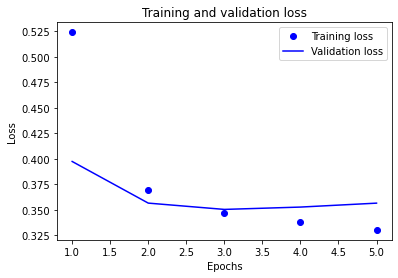

In [66]:
history_dict = history.history
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 9. 한국어 word2vec와 비교

https://github.com/mezcalagave/aiffel/blob/master/(E9)%209th_project-sentiment_classification.ipynb

## 결론

한국어 word2vec와 비교했을때에도 sentencepiece는 성능이 그다지 좋지 않다. 그 이유로는 영어와 한국어와의 차이가 있다고 생각한다.    
sentencepiece는 영어최적화되어 있으므로 성능이 비교적 쩔어지는 한계점을 갖고 있다..     
그렇지만 만일 unit을 많이 가져가게 된다면 sentencepiece 성능은 더 증가한다.    
그리고 Konlpy와 다르게 sentencepiece에는 과적합이 나타날 수 있다는 점도 문제점 중 하나이다.